In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans as KMeans, DBSCAN as DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve, classification_report
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedGroupKFold


from sklearn.pipeline import Pipeline
sns.set()
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.8/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
# lets import our data
# /content/drive/MyDrive/data.csv
df = pd.read_csv('/content/drive/MyDrive/data.csv')

as there are 18,000 rows in the dataset with null value for GDP, rather than introduce bias by imputing the target (class) for each row, drop them



In [3]:
gdp_col = 'owid_gdp_per_capita'

In [4]:
df = df[df[gdp_col].notna()]

In [ ]:
df # still huge im ok with it 46489 rows × 138 columns

,iso_code,country,date,jhu_confirmed,jhu_deaths,jhu_recovered,owid_total_cases,owid_new_cases,owid_total_deaths,owid_new_deaths,...,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_retail_and_recreation,google_mobility_change_residential,google_mobility_change_workplaces,sdsn_new_cases_per_million_smoothed,sdsn_new_deaths_per_million_smoothed,sdsn_effective_reproduction_rate_smoothed,sdsn_positive_test_rate_smoothed,sdsn_overall_transmission
72,ABW,Aruba,2020-03-13,NaN,NaN,NaN,2.0,2.0,NaN,0.0,...,-4.0,-5.0,-10.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN
78,ABW,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-41.0,-40.0,-52.0,21.0,-40.0,NaN,NaN,NaN,NaN,NaN
79,ABW,Aruba,2020-03-20,NaN,NaN,NaN,4.0,2.0,NaN,0.0,...,-41.0,-45.0,-53.0,22.0,-41.0,NaN,NaN,NaN,NaN,NaN
80,ABW,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-52.0,-54.0,-62.0,21.0,-40.0,NaN,NaN,NaN,NaN,NaN
81,ABW,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-52.0,-62.0,-70.0,NaN,-46.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,ZWE,Zimbabwe,2020-10-26,8303.0,242.0,7797.0,8276.0,7.0,237.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.273500,0.033571,NaN,0.023,1.0
64671,ZWE,Zimbabwe,2020-10-27,8315.0,242.0,7804.0,8303.0,27.0,242.0,5.0,...,NaN,NaN,NaN,NaN,NaN,1.355214,0.057571,NaN,0.025,1.0
64672,ZWE,Zimbabwe,2020-10-28,8320.0,242.0,7845.0,8315.0,12.0,242.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.340786,0.057571,NaN,0.023,1.0
64673,ZWE,Zimbabwe,2020-10-29,8349.0,242.0,7864.0,8320.0,5.0,242.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.273500,0.052786,NaN,0.023,1.0


Create a high correlation filter on the dataset

do not include the dependent variable (class)

Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping one of those variables.

In [5]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [6]:
# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['jhu_deaths',
 'jhu_recovered',
 'owid_total_cases',
 'owid_new_cases',
 'owid_total_deaths',
 'owid_total_tests',
 'owid_new_tests',
 'owid_new_tests_smoothed',
 'owid_new_tests_per_thousand',
 'owid_new_tests_smoothed_per_thousand',
 'owid_weekly_excess_mortality_p_score',
 'owid_weekly_excess_mortality_p_score_75_84',
 'owid_weekly_excess_mortality_p_score_85plus',
 'owid_weekly_deaths_2019',
 'owid_weekly_deaths_2018',
 'owid_weekly_deaths_2017',
 'owid_weekly_deaths_2016',
 'owid_weekly_deaths_2015',
 'owid_avg_weekly_deaths_2015_2019',
 'owid_population',
 'owid_aged_65_older',
 'owid_aged_70_older',
 'owid_life_expectancy',
 'ox_c1_school_closing',
 'ox_c2_workplace_closing',
 'ox_c3_cancel_public_events',
 'ox_c5_flag',
 'ox_confirmed_cases',
 'ox_confirmed_deaths',
 'ox_stringency_index',
 'ox_stringency_index_for_display',
 'ox_stringency_legacy_index',
 'ox_stringency_legacy_index_for_display',
 'ox_government_response_index',
 'ox_government_response_index_for_display',
 '

In [ ]:
len(to_drop)

73

In [7]:
# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
df

,iso_code,country,date,jhu_confirmed,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests_per_thousand,...,yougov_stopping_sending_children,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_workplaces,sdsn_new_deaths_per_million_smoothed,sdsn_overall_transmission
72,ABW,Aruba,2020-03-13,NaN,0.0,18.733,18.733,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,40.0,-4.0,-5.0,3.0,NaN,NaN
78,ABW,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-5.0,-41.0,-40.0,-40.0,NaN,NaN
79,ABW,Aruba,2020-03-20,NaN,0.0,37.465,18.733,NaN,0.000,NaN,...,NaN,NaN,NaN,NaN,-7.0,-41.0,-45.0,-41.0,NaN,NaN
80,ABW,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-19.0,-52.0,-54.0,-40.0,NaN,NaN
81,ABW,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-36.0,-52.0,-62.0,-46.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,ZWE,Zimbabwe,2020-10-26,8303.0,1.0,556.822,0.471,15.946,0.067,9.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033571,1.0
64671,ZWE,Zimbabwe,2020-10-27,8315.0,5.0,558.638,1.817,16.282,0.336,9.292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0
64672,ZWE,Zimbabwe,2020-10-28,8320.0,0.0,559.446,0.807,16.282,0.000,9.330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0
64673,ZWE,Zimbabwe,2020-10-29,8349.0,0.0,559.782,0.336,16.282,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052786,1.0


In [ ]:
df.isnull().sum() * 100 / len(df)

iso_code                                    0.000000
country                                     0.000000
date                                        0.000000
jhu_confirmed                               5.962701
owid_new_deaths                             1.374519
                                             ...    
google_mobility_change_parks               34.444707
google_mobility_change_transit_stations    34.350061
google_mobility_change_workplaces          32.949730
sdsn_new_deaths_per_million_smoothed        3.456732
sdsn_overall_transmission                  50.665749
Length: 65, dtype: float64

Let's try to just use Hist Gradient Boost Classifier first, 

Note the categorical features should be specified, and may be specified by index among others.
gbdt = HistGradientBoostingClassifier(categorical_features=[0])

In [8]:
df['owid_gdp_per_capita'].describe

<bound method NDFrame.describe of 72       35973.781
78       35973.781
79       35973.781
80       35973.781
81       35973.781
           ...    
64670     1899.775
64671     1899.775
64672     1899.775
64673     1899.775
64674     1899.775
Name: owid_gdp_per_capita, Length: 46489, dtype: float64>

In [9]:
# make some classes
# get the median of the dataframe

A = df['owid_gdp_per_capita'].quantile(q=0.25)
B = df['owid_gdp_per_capita'].quantile(q=0.5)
C = df['owid_gdp_per_capita'].quantile(q=0.75)

A, B, C#, D

(5321.444, 14048.881, 31400.84)

In [10]:
# assign class
# make a new column with the median split, if the movie rating is lower, assign 0, else assign 1

# base
df['Y'] = 'Z'

# if the column value is less than A, assign 'A'
df.loc[df[gdp_col] <= A, 'Y'] = 'A'
df.loc[( (df[gdp_col] > A) & (df[gdp_col] <= B) ), 'Y'] = 'B'
df.loc[( (df[gdp_col] > B) & (df[gdp_col] <= C) ), 'Y'] = 'C'
df.loc[df[gdp_col] > C, 'Y'] = 'D'

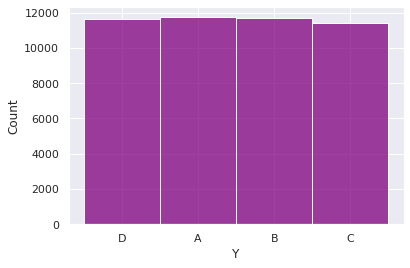

In [11]:
# plt.rcParams["figure.figsize"] = (10,10)
sns.histplot(df['Y'], color="purple")
# plt.plot(random_classifier, random_classifier, 'r--')
# plt.xlabel("FPR")
# plt.ylabel("TPR")
# plt.title("ROC Curve: %s" % movie)
plt.show()

# looking pretty balanced now! great.

In [ ]:
# split into train/test
df['Y'].describe()

count     46489
unique        4
top           A
freq      11739
Name: Y, dtype: object

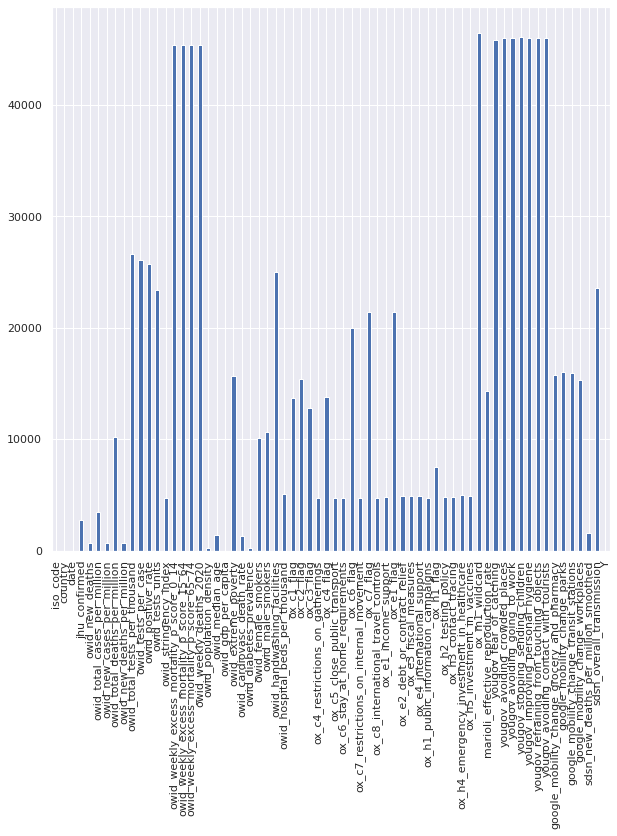

In [ ]:
# investigate the null situation
# number of nulls for each column
vc_nulls = df.apply(lambda x: x.isnull().value_counts()).T[True]
vc_nulls.hist() # if you want a histogram of these counts
# or if you wanted to plot the null count of each column as a bar
vc_nulls.plot(kind = 'bar')

In [ ]:
def get_nan_cols(df, nan_percent=0.8):
    threshold = len(df.index) * nan_percent
    return [c for c in df.columns if sum(df[c].isnull()) >= threshold]

In [ ]:
df_smaller = df.copy()

In [ ]:
to_delete_again = df_smaller[get_nan_cols(df, 0.5)]
to_delete_again.columns.tolist()

['owid_total_tests_per_thousand',
 'owid_tests_per_case',
 'owid_positive_rate',
 'owid_tests_units',
 'owid_weekly_excess_mortality_p_score_0_14',
 'owid_weekly_excess_mortality_p_score_15_64',
 'owid_weekly_excess_mortality_p_score_65_74',
 'owid_weekly_deaths_2020',
 'owid_handwashing_facilities',
 'ox_m1_wildcard',
 'yougov_fear_of_catching',
 'yougov_avoiding_crowded_places',
 'yougov_avoiding_going_to_work',
 'yougov_stopping_sending_children',
 'yougov_improving_personal_hygiene',
 'yougov_refraining_from_touching_objects',
 'yougov_avoiding_contact_with_tourists',
 'sdsn_overall_transmission']

In [ ]:
# Drop features 
df_smaller.drop(to_delete_again, axis=1, inplace=True)

In [ ]:
df_smaller

,iso_code,country,date,jhu_confirmed,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_stringency_index,...,ox_h3_contact_tracing,ox_h4_emergency_investment_in_healthcare,ox_h5_investment_in_vaccines,marioli_effective_reproduction_rate,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_workplaces,sdsn_new_deaths_per_million_smoothed,Y
72,ABW,Aruba,2020-03-13,NaN,0.0,18.733,18.733,NaN,0.000,0.00,...,0.0,0.0,0.0,NaN,40.0,-4.0,-5.0,3.0,NaN,D
78,ABW,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,33.33,...,1.0,0.0,0.0,NaN,-5.0,-41.0,-40.0,-40.0,NaN,D
79,ABW,Aruba,2020-03-20,NaN,0.0,37.465,18.733,NaN,0.000,33.33,...,1.0,0.0,0.0,NaN,-7.0,-41.0,-45.0,-41.0,NaN,D
80,ABW,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,44.44,...,1.0,0.0,0.0,NaN,-19.0,-52.0,-54.0,-40.0,NaN,D
81,ABW,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,44.44,...,1.0,0.0,0.0,NaN,-36.0,-52.0,-62.0,-46.0,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,ZWE,Zimbabwe,2020-10-26,8303.0,1.0,556.822,0.471,15.946,0.067,71.30,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.033571,A
64671,ZWE,Zimbabwe,2020-10-27,8315.0,5.0,558.638,1.817,16.282,0.336,71.30,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.057571,A
64672,ZWE,Zimbabwe,2020-10-28,8320.0,0.0,559.446,0.807,16.282,0.000,71.30,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.057571,A
64673,ZWE,Zimbabwe,2020-10-29,8349.0,0.0,559.782,0.336,16.282,0.000,71.30,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.052786,A


In [ ]:
df = df_smaller.copy()

In [12]:
# change ISO from text categorical to numeric index
# change iso code from categorical to numeric index
df['iso_code'] = pd.factorize(df['iso_code'])[0]
df

,iso_code,country,date,jhu_confirmed,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests_per_thousand,...,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_workplaces,sdsn_new_deaths_per_million_smoothed,sdsn_overall_transmission,Y
72,0,Aruba,2020-03-13,NaN,0.0,18.733,18.733,NaN,0.000,NaN,...,NaN,NaN,NaN,40.0,-4.0,-5.0,3.0,NaN,NaN,D
78,0,Aruba,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.0,-41.0,-40.0,-40.0,NaN,NaN,D
79,0,Aruba,2020-03-20,NaN,0.0,37.465,18.733,NaN,0.000,NaN,...,NaN,NaN,NaN,-7.0,-41.0,-45.0,-41.0,NaN,NaN,D
80,0,Aruba,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-19.0,-52.0,-54.0,-40.0,NaN,NaN,D
81,0,Aruba,2020-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-36.0,-52.0,-62.0,-46.0,NaN,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,183,Zimbabwe,2020-10-26,8303.0,1.0,556.822,0.471,15.946,0.067,9.221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033571,1.0,A
64671,183,Zimbabwe,2020-10-27,8315.0,5.0,558.638,1.817,16.282,0.336,9.292,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0,A
64672,183,Zimbabwe,2020-10-28,8320.0,0.0,559.446,0.807,16.282,0.000,9.330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0,A
64673,183,Zimbabwe,2020-10-29,8349.0,0.0,559.782,0.336,16.282,0.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052786,1.0,A


In [13]:
# then, drop non-numerics
drop_cols = [gdp_col]
# drop_cols = []

# don't have to drop iso_code anymore, i made it a numerical category
drop_cols.extend(['date','country'])
# drop_cols.extend(['date','country','owid_tests_units'])

df.drop(drop_cols, axis=1, inplace=True)



In [14]:
df.drop('owid_tests_units', axis=1, inplace=True)

In [15]:
df

,iso_code,jhu_confirmed,owid_new_deaths,owid_total_cases_per_million,owid_new_cases_per_million,owid_total_deaths_per_million,owid_new_deaths_per_million,owid_total_tests_per_thousand,owid_tests_per_case,owid_positive_rate,...,yougov_improving_personal_hygiene,yougov_refraining_from_touching_objects,yougov_avoiding_contact_with_tourists,google_mobility_change_grocery_and_pharmacy,google_mobility_change_parks,google_mobility_change_transit_stations,google_mobility_change_workplaces,sdsn_new_deaths_per_million_smoothed,sdsn_overall_transmission,Y
72,0,NaN,0.0,18.733,18.733,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,40.0,-4.0,-5.0,3.0,NaN,NaN,D
78,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-5.0,-41.0,-40.0,-40.0,NaN,NaN,D
79,0,NaN,0.0,37.465,18.733,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,-7.0,-41.0,-45.0,-41.0,NaN,NaN,D
80,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-19.0,-52.0,-54.0,-40.0,NaN,NaN,D
81,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-36.0,-52.0,-62.0,-46.0,NaN,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,183,8303.0,1.0,556.822,0.471,15.946,0.067,9.221,43.411,0.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033571,1.0,A
64671,183,8315.0,5.0,558.638,1.817,16.282,0.336,9.292,40.688,0.025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0,A
64672,183,8320.0,0.0,559.446,0.807,16.282,0.000,9.330,43.969,0.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.057571,1.0,A
64673,183,8349.0,0.0,559.782,0.336,16.282,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.052786,1.0,A


In [16]:
# imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

In [ ]:
cols_before = df.columns.tolist()
cols_before[:-1]

['iso_code',
 'jhu_confirmed',
 'owid_new_deaths',
 'owid_total_cases_per_million',
 'owid_new_cases_per_million',
 'owid_total_deaths_per_million',
 'owid_new_deaths_per_million',
 'owid_stringency_index',
 'owid_population_density',
 'owid_median_age',
 'owid_extreme_poverty',
 'owid_cardiovasc_death_rate',
 'owid_diabetes_prevalence',
 'owid_female_smokers',
 'owid_male_smokers',
 'owid_hospital_beds_per_thousand',
 'ox_c1_flag',
 'ox_c2_flag',
 'ox_c3_flag',
 'ox_c4_restrictions_on_gatherings',
 'ox_c4_flag',
 'ox_c5_close_public_transport',
 'ox_c6_stay_at_home_requirements',
 'ox_c6_flag',
 'ox_c7_restrictions_on_internal_movement',
 'ox_c7_flag',
 'ox_c8_international_travel_controls',
 'ox_e1_income_support',
 'ox_e1_flag',
 'ox_e2_debt_or_contract_relief',
 'ox_e3_fiscal_measures',
 'ox_e4_international_support',
 'ox_h1_public_information_campaigns',
 'ox_h1_flag',
 'ox_h2_testing_policy',
 'ox_h3_contact_tracing',
 'ox_h4_emergency_investment_in_healthcare',
 'ox_h5_investme

In [ ]:
# now, just add a knn imputer and pickle this
imputer = KNNImputer(n_neighbors=15, weights='distance', metric='nan_euclidean')

In [ ]:
# first, remove the class column
X = df.loc[:, df.columns != 'Y']

# fit to the entire set
imputer.fit(X)
# transform the dataset
Xtrans = imputer.transform(X)

In [ ]:
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 0


In [ ]:
# # scale the data, this is apparently needed for both MLP and KNN classifiers
# #
trans = StandardScaler()
Xtrans = trans.fit_transform(Xtrans)
# ##
# # ONLY NEEDED FOR KNN ^

In [ ]:
df2 = pd.DataFrame(Xtrans)
X_combined = df2.copy()
X_combined = X_combined.rename(columns={0:"iso_code"}) 
# X_combined = X_combined.rename(columns=cols_before) 

In [ ]:
# re-attach the Y target again, 
X_combined['Y'] = df['Y'].values
X_combined[:-1].isna().sum().sum()

0

In [ ]:
# ok so thats done now.. now i have my imputed dataframe
# X_combined.to_pickle('/content/drive/MyDrive/pickle_scaled_notscaled.csv')

X_combined.to_pickle('/content/drive/MyDrive/pickle_scaled.csv')

# scaling is used in both MLP and KNN, so i can just write this object.
# X_combined = pd.to_pickle('/content/drive/MyDrive/pickle_scaled_notnormalized.csv')

Now that I assigned a new class variable, i can drop the previous numeric column (which could be used for regression, i suppose)

In [17]:
# define groups
groups = df['iso_code'].values
n_splits = 10

In [18]:
# separate predictors from target
X = df.loc[:, df.columns != 'Y']
Y = df['Y']

Y.shape, X.shape

((46489,), (46489, 61))

In [19]:
# use stratified group kfold
sgkf = StratifiedGroupKFold(n_splits=10)

In [20]:
classifier =  HistGradientBoostingClassifier()


In [ ]:
classifier.get_params()

# learning rate GB, 0.01 to 0.2 start smaller
# num trees (max_iter), 100 to 1000 start smaller 
# depth of tree (max_depth), typically 2-8, too deep may overfit

{'categorical_features': None,
 'early_stopping': 'auto',
 'l2_regularization': 0.0,
 'learning_rate': 0.1,
 'loss': 'auto',
 'max_bins': 255,
 'max_depth': None,
 'max_iter': 100,
 'max_leaf_nodes': 31,
 'min_samples_leaf': 20,
 'monotonic_cst': None,
 'n_iter_no_change': 10,
 'random_state': None,
 'scoring': 'loss',
 'tol': 1e-07,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [21]:
# attempt to find the right parameters through cross validation

accuracies = []
cfs = []

# for train, test in enumerate(sgkf.split(X, Y, groups=groups)):
for split, (train, test) in enumerate(sgkf.split(X, Y, groups=groups)):
  print(split)
  print(train)
  print(test)

  x_train_grouped = X.values[train]
  x_test_grouped = X.values[test]
  y_train_grouped = Y.values[train]
  y_test_grouped = Y.values[test]

  classifier = HistGradientBoostingClassifier(learning_rate=0.01, max_depth=32, max_iter=100, random_state=12)
  classifier.fit(x_train_grouped,y_train_grouped)
  

  y_pred = classifier.predict(x_test_grouped)
  acc = accuracy_score(y_pred, y_test_grouped)
  accuracies.append(acc)
  # print("Accuracy of the model is: %.3f" % acc)
  # print("\t validation score: %s" % classifier.validation_score_)
  print("\t params: %s" % classifier.get_params())

  report = classification_report(y_pred, y_test_grouped)
  print('report:', report, sep='\n')

  conf_matrix = confusion_matrix(y_test_grouped, y_pred)
  cfs.append(conf_matrix)


0
[    0     1     2 ... 46486 46487 46488]
[  991   992   993 ... 44269 44270 44271]
	 params: {'categorical_features': None, 'early_stopping': 'auto', 'l2_regularization': 0.0, 'learning_rate': 0.01, 'loss': 'auto', 'max_bins': 255, 'max_depth': 32, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 20, 'monotonic_cst': None, 'n_iter_no_change': 10, 'random_state': 12, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
report:
              precision    recall  f1-score   support

           A       0.55      0.74      0.63       884
           B       0.38      0.34      0.36      1370
           C       0.73      0.42      0.53      1862
           D       0.46      1.00      0.63       530

    accuracy                           0.52      4646
   macro avg       0.53      0.63      0.54      4646
weighted avg       0.56      0.52      0.51      4646

1
[    0     1     2 ... 46486 46487 46488]
[ 1536  1537  1538 ... 44574 44575 

In [24]:
def Average(lst):
    return sum(lst) / len(lst)

In [25]:
Average(accuracies)

# all below, using random_state=12

# learning rate 0.01 (no max-depth specified) 0.6113
# learning rate 0.01 (max-depth = 8),         0.6032
# learning rate 0.05 (max-depth = 8),         0.5818

# learning rate 0.01 (max-depth = 16),        0.6063
# learning rate 0.01 (max-depth = 32),        0.6113 (max_iter = 100)
# learning rate 0.01 (max-depth = 40),        0.6113 (max_iter = 100)
  # max-depth of 32 will capture all of the information available, because that will cover 32 splits (64 decisions,variables)

# learning rate 0.01 (max-depth = 32)(max_iter = 150),        0.5901
# learning rate 0.01 (max-depth = 32)(max_iter = 200),        0.5869

# learning rate 0.1 (max-depth = 32)(max_iter = 100),        0.58944

# BEST PARAMS lr = 0.01, depth = 32, max trees = 100 (random_state=12) yielded 0.6113

# wow interesting, without random-state-12 now its lower, o well.

0.6113145186108119

In [ ]:
# make a plot with average F1 score for each class
# make a plot with the accuracy of each split (this will need to be done in the same loop for all classifiers)
# how to do this? will need to use imputed data for the gradientboost for this plot.

#ex. array with the following:
# fold1 accuracy
# fold2 accuracy
# ...

# 
accuracies

# used random state of 12 earlier in tuning, 
# [0.524321997417133,
#  0.6184495452576874,
#  0.644064028457092,
#  0.5510523958799821,
#  0.4932900432900433,
#  0.6771891891891892,
#  0.7239893289554689,
#  0.5799869763403517,
#  0.6329377472413075,
#  0.6678639340798648]

# also get rid of random state and run it again just in case (its lower now.)
# [0.587602238484718,
#  0.6203984408834994,
#  0.644064028457092,
#  0.4910434393193014,
#  0.4932900432900433,
#  0.6739459459459459,
#  0.7155756207674944,
#  0.5137833731278489,
#  0.5492400582968978,
#  0.6228607648425946]

[0.587602238484718,
 0.6203984408834994,
 0.644064028457092,
 0.4910434393193014,
 0.4932900432900433,
 0.6739459459459459,
 0.7155756207674944,
 0.5137833731278489,
 0.5492400582968978,
 0.6228607648425946]

In [ ]:
# i also need to save the F1 scores for each class (do it again using random_state=12)

# A
hgb_a = [0.63, 0.56, 0.83, 0.88, 0.70, 0.90, 0.88, 0.66, 0.82, 0.79]
# B
hgb_b = [0.36, 0.48, 0.32, 0.21, 0.46, 0.59, 0.51, 0.47, 0.56, 0.40]
# C
hgb_c = [0.53, 0.45, 0.29, 0.43, 0.28, 0.38, 0.48, 0.33, 0.51, 0.79]
# D
hgb_d = [0.63, 1.00, 0.89, 0.65, 0.50, 0.70, 1.00, 0.77, 0.59, 0.68]

# accuracies between folds
hgb_accuracies_folds = [ 0.524321997417133,
 0.6184495452576874,
 0.644064028457092,
 0.5510523958799821,
 0.4932900432900433,
 0.6771891891891892,
 0.7239893289554689,
 0.5799869763403517,
 0.6329377472413075,
 0.6678639340798648]

In [26]:
for x in cfs:
  print(x)

[[658 305 226   0]
 [223 468 551   0]
 [  0 295 780   0]
 [  3 302 305 530]]
[[ 528  414  226    0]
 [ 201  722  311    0]
 [   0  610  466    0]
 [   0    0    0 1140]]
[[1143    0    0    0]
 [ 456  305  305    0]
 [   0  535  232  305]
 [   0    0    0 1217]]
[[1143    0    0    0]
 [ 305  225  536    0]
 [   0  547  528    0]
 [   0  305  312  565]]
[[898 242   0   0]
 [220 534 501   0]
 [305   0 305 463]
 [  0 305 305 542]]
[[1153    0    0    0]
 [ 267  532  236  221]
 [   0    6  305  763]
 [   0    0    0 1142]]
[[1169   20    0    0]
 [ 303  704  243    0]
 [   0  778  465    1]
 [   0    0    0 1190]]
[[ 672  469    0    0]
 [ 224  537  305    0]
 [   0  230  305  707]
 [   0    0    0 1158]]
[[1161    3    3    0]
 [ 305  689    0  248]
 [ 210  305  505  225]
 [   0  234  230  685]]
[[ 859  447    0    0]
 [   0  451  314  275]
 [   0    0 1006  231]
 [   0  305    0  845]]


In [27]:
## Confusion Matrix for the predicted outputs
conf_matrix = confusion_matrix(Y_test, y_pred)
conf_matrix

NameError: ignored

In [28]:
picked = cfs[-5]
picked

array([[1153,    0,    0,    0],
       [ 267,  532,  236,  221],
       [   0,    6,  305,  763],
       [   0,    0,    0, 1142]])

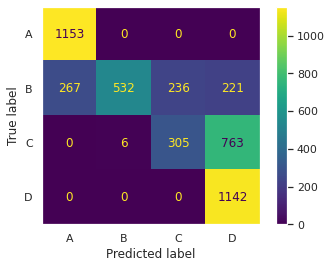

In [29]:
disp=ConfusionMatrixDisplay(confusion_matrix=picked, display_labels=classifier.classes_)
disp.plot()
plt.grid()
plt.show()

In [ ]:
confusion_matrix(Y_test, y_pred, normalize="true").diagonal()

array([0.63092417, 0.52040816, 0.55558876, 0.90975704])

In [ ]:
report = classification_report(Y_test, y_pred)
print('report:', report, sep='\n')

report:
              precision    recall  f1-score   support

           A       0.64      0.63      0.63      1688
           B       0.41      0.52      0.46      1764
           C       0.80      0.56      0.66      3346
           D       0.75      0.91      0.82      2593

    accuracy                           0.66      9391
   macro avg       0.65      0.65      0.64      9391
weighted avg       0.68      0.66      0.66      9391



# New Section